Diretório de trabalho: D:\Documentos\PROJETOS\Análise de Risco e Liquidez — B3 (Listado)
Merge concluído. Shape: (95660, 66)


,RptDt_x,TckrSymb,ISIN_x,SgmtNm_x,MinPric,MaxPric,TradAvrgPric,LastPric,OscnPctg,AdjstdQt,...,DaysToSttlm,SrsTpNm,PrtcnFlg,AutomtcExrcInd,SpcfctnCd,CrpnNm,CorpActnStartDt,CtdyTrtmntTpNm,MktCptlstn,CorpGovnLvlNm
0,2025-08-22,A1AP34,BRA1APBDR001,CASH,"19,5","19,66","19,6","19,56","2,19",NaN,...,2,NaN,NaN,NaN,DRN,ADVANCE AUTO PARTS INC,9999-12-31,FUNGIBLE,957330240,NaN
1,2025-08-22,A1DI34,BRA1DIBDR000,CASH,"684,24","684,24","684,24","684,24","8,11",NaN,...,2,NaN,NaN,NaN,DRN,ANALOG DEVICES INC,9999-12-31,FUNGIBLE,739119600,NaN
2,2025-08-22,A1DM34,BRA1DMBDR002,CASH,"338,25","340,3","338,64","340,3","1,49",NaN,...,2,NaN,NaN,NaN,DRN ED,ARCHER-DANIELS-MIDLAND CO,9999-12-31,FUNGIBLE,501763500,NaN
3,2025-08-22,A1EG34,BRA1EGBDR002,CASH,"43,16","43,44","43,35","43,16","5,86",NaN,...,2,NaN,NaN,NaN,DRN,AEGON LTD.,9999-12-31,FUNGIBLE,2112748000,NaN
4,2025-08-22,A1ES34,BRA1ESBDR007,CASH,"72,52","73,08","72,7","73,08","1,93",NaN,...,2,NaN,NaN,NaN,DRN,AES CORP,9999-12-31,FUNGIBLE,667395100,NaN


Resumo estatístico de preços:


,MinPric,MaxPric,TradAvrgPric,LastPric
count,12104,12112,12113,12105
unique,2499,2520,2615,2547
top,"0,01","0,01","0,01","0,01"
freq,505,290,422,410


Contagem de ativos por segmento:


SgmtNm_x
EQUITY PUT      42895
EQUITY CALL     42845
FINANCIAL        6459
AGRIBUSINESS     1687
CASH             1353
ODD LOT           401
FORWARD            20
Name: count, dtype: int64

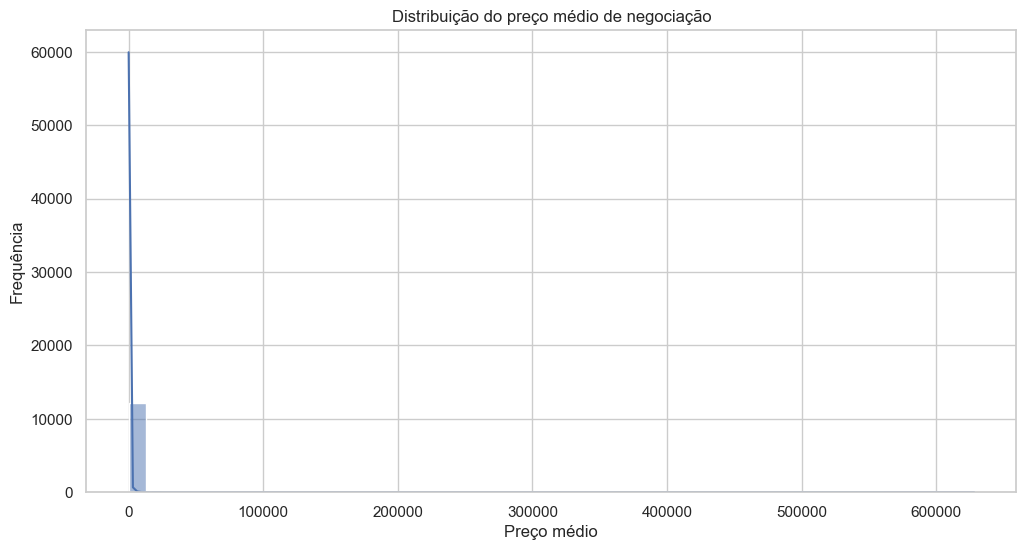

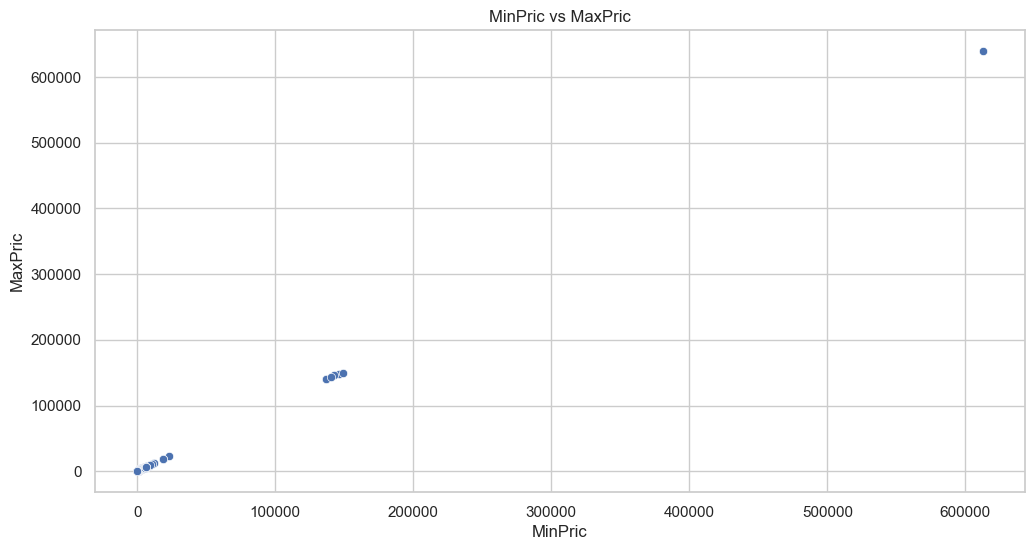

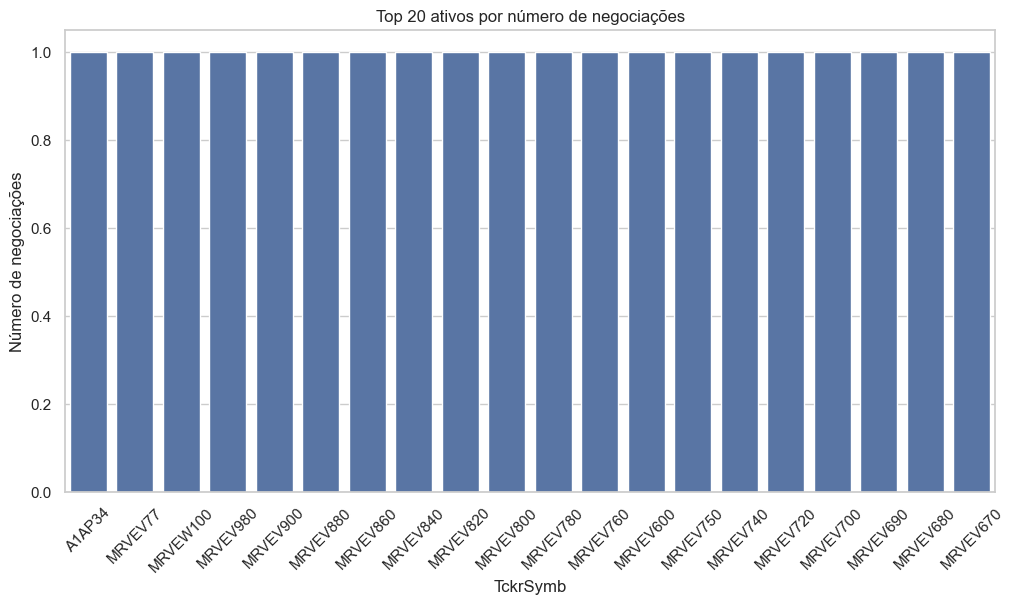

In [1]:
# 02_analysis.ipynb
# =====================================
# Análise Exploratória de Dados - B3

# ------------------------
# 0. Importar bibliotecas
# ------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configurações gerais de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ------------------------
# 1. Definir diretório de trabalho
# ------------------------
os.chdir(r"D:\Documentos\PROJETOS\Análise de Risco e Liquidez — B3 (Listado)")
print("Diretório de trabalho:", os.getcwd())

# ------------------------
# 2. Arquivos
# ------------------------
RAW_DIR = "data/raw"
PROCESSED_DIR = "data/processed"

instruments_file = os.path.join(RAW_DIR, "InstrumentsConsolidatedFile_20250822_1.csv")
trades_file = os.path.join(RAW_DIR, "TradeInformationConsolidatedFile_20250822_1.csv")

# ------------------------
# 3. Ler CSVs
# ------------------------
df_instruments = pd.read_csv(instruments_file, sep=';', encoding='latin1', skiprows=1, dtype=str)
df_trades = pd.read_csv(trades_file, sep=';', encoding='latin1', skiprows=1, dtype=str)

# Limpar nomes de colunas
df_instruments.columns = df_instruments.columns.str.strip()
df_trades.columns = df_trades.columns.str.strip()

# ------------------------
# 4. Limpar duplicatas
# ------------------------
df_instruments.drop_duplicates(inplace=True)
df_trades.drop_duplicates(inplace=True)

# ------------------------
# 5. Converter datas
# ------------------------
df_trades['RptDt'] = pd.to_datetime(df_trades['RptDt'], dayfirst=False, errors='coerce')
df_instruments['RptDt'] = pd.to_datetime(df_instruments['RptDt'], dayfirst=False, errors='coerce')

# ------------------------
# 6. Merge dos dados
# ------------------------
df_merged = df_trades.merge(
    df_instruments,
    how='left',
    left_on='TckrSymb',
    right_on='TckrSymb'
)

print("Merge concluído. Shape:", df_merged.shape)
display(df_merged.head())

# ------------------------
# 7. Estatísticas básicas
# ------------------------
print("Resumo estatístico de preços:")
display(df_merged[['MinPric', 'MaxPric', 'TradAvrgPric', 'LastPric']].describe())

print("Contagem de ativos por segmento:")
display(df_merged['SgmtNm_x'].value_counts())

# ------------------------
# 8. Exemplos de gráficos
# ------------------------

# Histograma de preço médio de negociação
df_merged['TradAvrgPric'] = pd.to_numeric(df_merged['TradAvrgPric'].str.replace(',', '.'), errors='coerce')
sns.histplot(df_merged['TradAvrgPric'].dropna(), bins=50, kde=True)
plt.title("Distribuição do preço médio de negociação")
plt.xlabel("Preço médio")
plt.ylabel("Frequência")
plt.show()

# Scatter plot de MinPric vs MaxPric
df_merged['MinPric'] = pd.to_numeric(df_merged['MinPric'].str.replace(',', '.'), errors='coerce')
df_merged['MaxPric'] = pd.to_numeric(df_merged['MaxPric'].str.replace(',', '.'), errors='coerce')

sns.scatterplot(x='MinPric', y='MaxPric', data=df_merged)
plt.title("MinPric vs MaxPric")
plt.xlabel("MinPric")
plt.ylabel("MaxPric")
plt.show()

# Contagem de negociações por ativo
top_assets = df_merged['TckrSymb'].value_counts().head(20)
sns.barplot(x=top_assets.index, y=top_assets.values)
plt.title("Top 20 ativos por número de negociações")
plt.xticks(rotation=45)
plt.ylabel("Número de negociações")
plt.show()
